<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast%E3%82%AB%E3%83%BC%E3%83%96%E3%81%AE%E5%9B%9E%E8%BB%A2%E6%95%B0%E3%81%A8%E8%90%BD%E5%B7%AE%E3%81%AE%E7%9B%B8%E9%96%A2%E9%96%A2%E4%BF%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ライブラリーのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt^get -y install fonts-ipaexfont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.4 MB/s eta 0:00:00
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=9aa20b82579d7d32eac3caad7ac429791c4a07957c5dc196e35c3283cd377943
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jam

In [ ]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [ ]:
#データの読み込みと結合
#ファイル名とパターンに一致するＣＳＶを取得
csv_files_pattern=("sample_data/statcast_*.csv")
csv_files=glob.glob(csv_files_pattern)

In [ ]:
#各ＣＳＶファイルの読み込み と リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生:{e}")

sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。
sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。


In [ ]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs,ignore_index=True)
  df=df_combined #結合したファイルをdfに格納
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数: {len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2025-06-30,87.9,2.95,6.34,"Banks, Tanner",630105,621383,field_out,hit_into_play,...,2.0,2.73,-0.56,-0.56,47.2,16.527261,-9.630745,36.373491,37.189388,35.693294
1,SI,2025-06-30,92.7,2.53,6.49,"Banks, Tanner",630105,621383,NaN,ball,...,2.0,2.00,1.18,1.18,47.4,NaN,NaN,NaN,NaN,NaN
2,FF,2025-06-30,93.2,2.59,6.47,"Banks, Tanner",593428,621383,single,hit_into_play,...,2.0,1.80,-0.09,0.09,49.3,4.244712,7.659826,31.567804,31.050805,25.892308
3,SL,2025-06-30,87.3,2.82,6.42,"Banks, Tanner",593428,621383,NaN,ball,...,2.0,2.66,-0.46,0.46,46.9,NaN,NaN,NaN,NaN,NaN
4,SL,2025-06-30,87.9,2.74,6.43,"Banks, Tanner",593428,621383,NaN,ball,...,2.0,2.47,-0.55,0.55,47.3,NaN,NaN,NaN,NaN,NaN


結合後の行数: 742080


相関関数(回転数 vs pfx_z) : 0.208
相関関数(回転数 vs Total Drop) : 0.028


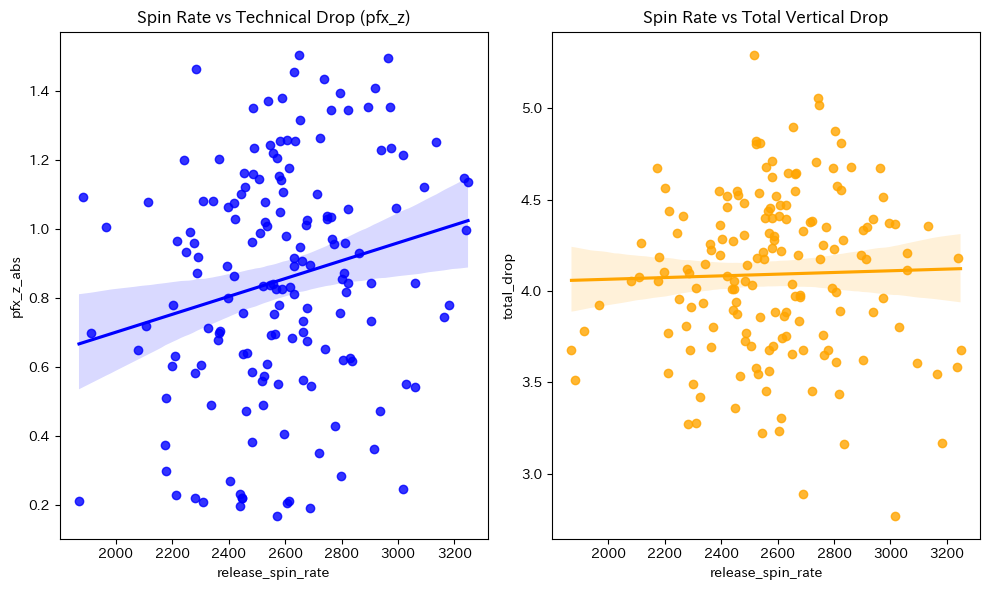

In [ ]:
#1. データクレンジングと指標の計算
curve_data=df[df["pitch_name"]=="Curveball"].copy()

# [ルール] 名 姓 の順 3f精度の設定
curve_data["player_name"]=curve_data["player_name"].apply(lambda x: " ".join(x.split(", ")
[::-1]))
pd.options.display.float_format="{:,3f}".format

#技術的変化量(pfx_z)と物理的総落差(total_drop)の算出
curve_data["pfx_z_abs"]=curve_data["pfx_z"].abs()
curve_data["total_drop"]=curve_data["release_pos_z"]-curve_data["plate_z"]

#2. 投手ごとの集計(１００球以上限定、カンマなし表示）)
stats=curve_data.groupby("player_name").agg({
    "release_spin_rate":"mean",
    "pfx_z_abs":"mean",
    "total_drop":"mean",
    "pitch_name":"count"
}).rename(columns={"pitch_name":"pitch_count"})
stats=stats[stats["pitch_count"] >=100]

#3. 相関係数の出力
corr_pfx=stats["release_spin_rate"].corr(stats["pfx_z_abs"])
corr_total=stats["release_spin_rate"].corr(stats["total_drop"])

print(f"相関関数(回転数 vs pfx_z) : {corr_pfx:.3f}")
print(f"相関関数(回転数 vs Total Drop) : {corr_total:.3f}")

#4.可視化(２つの視点で比較)
fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(10,6))

#左 技術的鋭さとの相関
sns.regplot(data=stats, x="release_spin_rate", y="pfx_z_abs",ax=ax1,color="blue")
ax1.set_title(f"Spin Rate vs Technical Drop (pfx_z)")

#右 物理的総落差との相関
sns.regplot(data=stats, x="release_spin_rate",y="total_drop",ax=ax2, color="orange")
ax2.set_title(f"Spin Rate vs Total Vertical Drop")

plt.tight_layout()
plt.show()